In [1]:
import sys, os
import numpy             as np
import scipy             as sp
import matplotlib.pyplot as plt

path_PythonCodeSet = "/Users/miiya/python_code-set/lib"
sys.path.append(path_PythonCodeSet)

from sch_diffeq.solve_diffeq       import func_Helmholtz_ode
from sch_diffeq.solve_diffeq_mixLS import *
from fitting.fitfunc_type          import set_fitfunc_from_fname
from fitting.io_params             import input_params
from misc_QM.special_functions     import *

hbar_c = 197.327053

Vc_name, pc_all = input_params("/Users/miiya/data/Kconf_NN/Pot.NN_NN.V_C.J_1.t07.fitparam")
Vt_name, pt_all = input_params("/Users/miiya/data/Kconf_NN/Pot.NN_NN.V_T.J_1.t08.fitparam")

Vc = set_fitfunc_from_fname(Vc_name)
Vt = set_fitfunc_from_fname(Vt_name)

pc = pc_all[0,:]
pt = pt_all[0,:]

E  = np.arange(100)
mu = 500
k  = np.sqrt(2.0*mu*E) / hbar_c

rini = 1e-5
rmax = 10
r    = np.linspace(rini, rmax, 100)

# Successful to input fit parameters.
# N.conf    = 23
# N.param   = 6
# func_name = 3G
# Successful to input fit parameters.
# N.conf    = 23
# N.param   = 6
# func_name = 2Y


In [2]:
Tmat = np.array([solve_sch_diff_mixLS(Vc, pc, Vt, pt, mu, E, rmax)])

In [3]:
from Tmatrix.convert_mat       import convert_TtoS
from Tmatrix.calc_phase_shift  import *

Ndata = len(E)
convert_TtoS(Tmat)

phase  = np.array([calc_phase_Sii(Tmat[0,:,ich,ich], shift_disc = 5) for ich in range(2)])

MixAng = np.array([np.arccos(within_one(phase[0,1,iE])) * 90.0 / np.pi for iE in range(Ndata)])

phase[1,0,:] = np.array([0.0 if (abs(phase[0,1,iE]-1.0) < 1e-10) else phase[1,0,iE] for iE in range(Ndata)])

In [4]:
from scipy.integrate import odeint
from scipy.special   import spherical_jn, spherical_yn, riccati_jn, riccati_yn
from numpy.linalg    import inv

E  = 100
mu = 500
k  = np.sqrt(2.0*mu*E) / hbar_c

iphi = np.array([rini**1, rini**3, 1.0, 3*rini**2])
ret1 = odeint(func_sch_ode_mixLS, iphi, r, args=(Vc, pc, Vt, pt, E, mu))
iphi = np.array([rini**1, rini**3, 0.0, 3*rini**2])
ret2 = odeint(func_sch_ode_mixLS, iphi, r, args=(Vc, pc, Vt, pt, E, mu))

hmatS = np.array([[[riccati_hn1(0,k*r[ir]     ), riccati_hn2(0,k*r[ir]     )],
                   [riccati_hn1(0,k*r[ir],True), riccati_hn2(0,k*r[ir],True)]] 
                   for ir in range(len(r))])

hmatD = np.array([[[riccati_hn1(2,k*r[ir]     ), riccati_hn2(2,k*r[ir]     )],
                   [riccati_hn1(2,k*r[ir],True), riccati_hn2(2,k*r[ir],True)]] 
                   for ir in range(len(r))])

J1_1 = np.array([np.dot(np.linalg.inv(hmatS[ir,:,:]),np.array([ret1[ir,0],ret1[ir,2]/k])) 
                 for ir in range(len(r))])

J2_1 = np.array([np.dot(np.linalg.inv(hmatD[ir,:,:]),np.array([ret1[ir,1],ret1[ir,3]/k])) 
                 for ir in range(len(r))])

J1_2 = np.array([np.dot(np.linalg.inv(hmatS[ir,:,:]),np.array([ret2[ir,0],ret2[ir,2]/k])) 
                 for ir in range(len(r))])

J2_2 = np.array([np.dot(np.linalg.inv(hmatD[ir,:,:]),np.array([ret2[ir,1],ret2[ir,3]/k])) 
                 for ir in range(len(r))])

(0, 100)

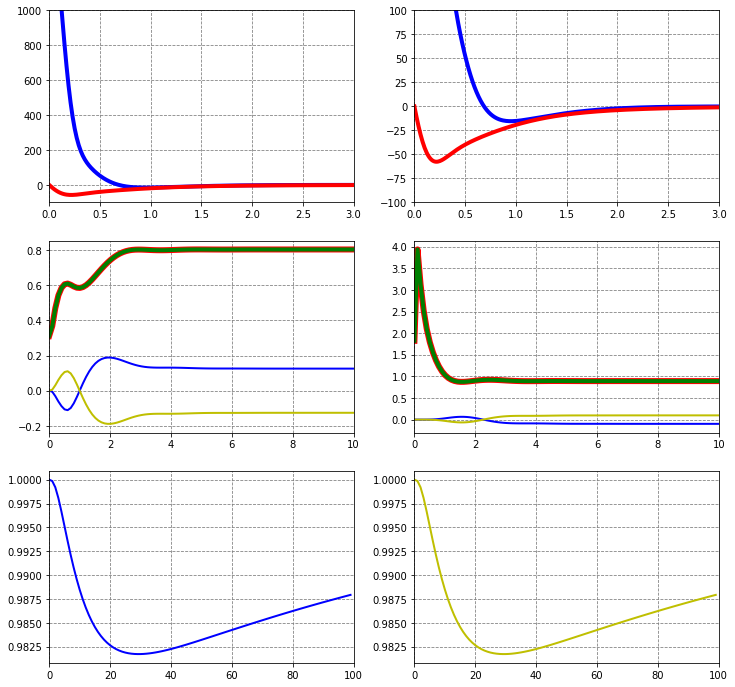

In [14]:
Ncol = 2; Nrow = 3
fig, axe = plt.subplots(ncols=Ncol, nrows=Nrow, figsize=(12,12))

pot_rmax = 3
rrr = np.linspace(10e-10, pot_rmax, 300)
axe[0,0].plot(rrr, Vc(rrr, *pc), 'b-', lw=4)
axe[0,0].plot(rrr, Vt(rrr, *pt), 'r-', lw=4)
axe[0,0].set_ylim([-100, 1000])
axe[0,1].plot(rrr, Vc(rrr, *pc), 'b-', lw=4)
axe[0,1].plot(rrr, Vt(rrr, *pt), 'r-', lw=4)
axe[0,1].set_ylim([-100, 100])

axe[1,0].plot(r, J1_1[:,0].real, 'r-', lw=6)
axe[1,0].plot(r, J1_1[:,0].imag, 'b-', lw=2)
axe[1,0].plot(r, J1_1[:,1].real, 'g-', lw=4)
axe[1,0].plot(r, J1_1[:,1].imag, 'y-', lw=2)

axe[1,1].plot(r, J2_1[:,0].real, 'r-', lw=6)
axe[1,1].plot(r, J2_1[:,0].imag, 'b-', lw=2)
axe[1,1].plot(r, J2_1[:,1].real, 'g-', lw=4)
axe[1,1].plot(r, J2_1[:,1].imag, 'y-', lw=2)

#axe[2,0].plot(r, J1_2[:,0].real, 'r-', lw=6)
#axe[2,0].plot(r, J1_2[:,0].imag, 'b-', lw=2)
#axe[2,0].plot(r, J1_2[:,1].real, 'g-', lw=4)
#axe[2,0].plot(r, J1_2[:,1].imag, 'y-', lw=2)

E  = np.arange(100)

#axe[2,0].plot(E, phase[0,0,:], 'r-', lw=6)
axe[2,0].plot(E, phase[0,1,:], 'b-', lw=2)
#axe[2,1].plot(E, phase[1,0,:], 'g-', lw=4)
axe[2,1].plot(E, phase[1,1,:], 'y-', lw=2)
#axe[2,1].plot(E, MixAng, 'r-', lw=2)

#for i in range(2):
#    for j in range(2):
#        axe[i+1,j].plot(r, Smat[:,i,j].real, 'r-', lw=4)
#        axe[i+1,j].plot(r, Smat[:,i,j].imag, 'b-', lw=4)

for i in range(Nrow):
    for j in range(Ncol):
        axe[i,j].grid(which='major',color='gray',linestyle='--')
        #axe[i,j].axhline(0.0, lw=2, color='black')

for j in range(Ncol):
    axe[0,j].set_xlim([10e-10, pot_rmax])
    for i in range(1,3):
        axe[i,j].set_xlim([0, rmax])
        #axe[i,j].set_ylim([-0.005, 0])

axe[2,0].set_xlim([0, 100])
axe[2,1].set_xlim([0, 100])